In [74]:
import tensorflow as tf
from tensorflow import keras 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 9s 2us/step


In [37]:
#Optional
print(dir(fashion_mnist))
print(test_images[0].shape)
print(train_images.shape)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'load_data']
(28, 28)
(60000, 28, 28)


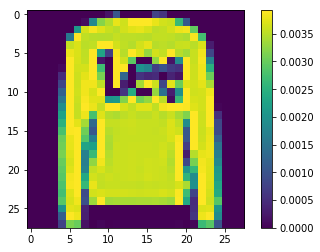

In [77]:
#Optional
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.gca().grid(False)

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [40]:
len(train_labels)

60000

In [72]:
#train_images[0]/255

In [73]:
#Scaling
train_images = train_images / 255.0

test_images = test_images / 255.0

c:\users\nuclear\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


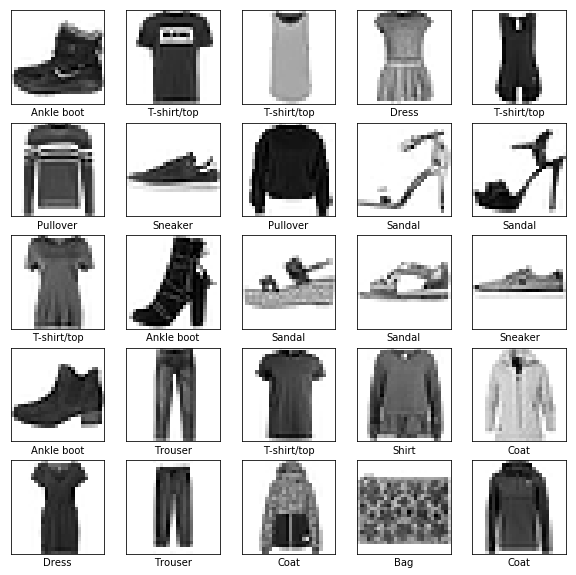

In [75]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [87]:
#Test
#model = keras.Sequential()
#model.add(keras.layers.Flatten(input_shape=(28, 28)))
#print(model.outputs)

In [88]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [89]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [96]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.3955 - acc: 0.8607
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3915 - acc: 0.8621
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3879 - acc: 0.8638
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.3840 - acc: 0.8649
Epoch 5/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3802 - acc: 0.8658


In [99]:
#Next, compare how the model performs on the test dataset:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test loss', test_loss,'Test accuracy:', test_acc)
#print(model.metrics_names)

10000/10000 [==============================] - 0s 20us/step
Test loss 0.4189862202167511 Test accuracy: 0.8489


In [100]:
predictions = model.predict(test_images)

In [102]:
predictions[0]

array([5.9061978e-07, 8.4799225e-09, 5.1302022e-06, 3.0234987e-06,
       7.6234928e-06, 1.7505214e-01, 2.8700413e-05, 1.3134634e-01,
       6.9674272e-03, 6.8658900e-01], dtype=float32)

In [105]:
np.argmax(predictions[0])

9

In [106]:
#Check
test_labels[0]

9

c:\users\nuclear\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


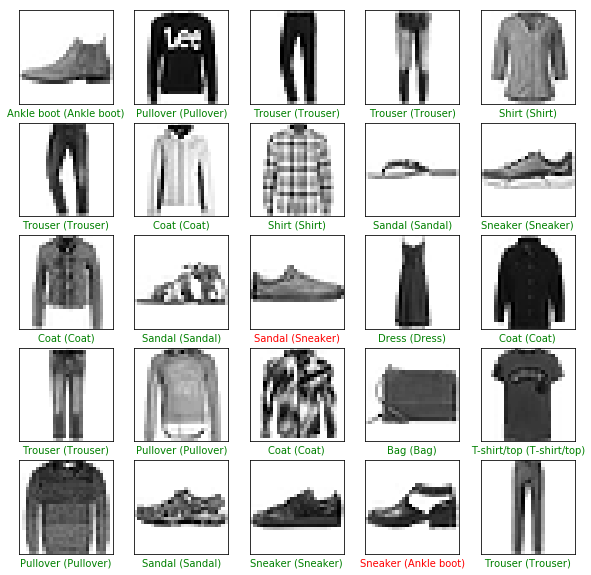

In [108]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

In [109]:
#Finally, use the trained model to make a prediction about a single image

In [118]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [119]:
img = (np.expand_dims(img,0)) # add the proper dimension 

print(img.shape)

(1, 28, 28)


In [121]:
predictions = model.predict(img)
print(predictions)

[[5.9061875e-07 8.4799243e-09 5.1302031e-06 3.0234935e-06 7.6234942e-06
  1.7505205e-01 2.8700391e-05 1.3134630e-01 6.9674184e-03 6.8658912e-01]]


In [123]:
prediction = predictions[0]
print(predictions[0])

np.argmax(prediction)

[5.9061875e-07 8.4799243e-09 5.1302031e-06 3.0234935e-06 7.6234942e-06
 1.7505205e-01 2.8700391e-05 1.3134630e-01 6.9674184e-03 6.8658912e-01]


9